# Data exploration

Visual exploration of the input data.

In [2]:
# red is mlp
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from reco.plotting import get_event_window
from reco.distance import get_z_map

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# ds_name = "MultiParticle"
# file_name = "new_ntuples_15163313_7.root"

ds_name = "CloseByGamma200PUFull_new"
file_name = "new_ntuples_15410634_104.root"

data_root = "data"
raw_dir = f"/Users/ecuba/data/{ds_name}"

file_path = f"{raw_dir}/{file_name}"

In [3]:
histo = uproot.open({file_path: "ticlNtuplizer"})
tracksters = uproot.open({file_path: "ticlNtuplizer/tracksters"})
simtracksters = uproot.open({file_path: "ticlNtuplizer/simtrackstersSC"})
associations = uproot.open({file_path: "ticlNtuplizer/associations"})
trackstersMerged = uproot.open({file_path: "ticlNtuplizer/trackstersMerged"})

In [4]:
ev_per_file = len(tracksters["raw_em_energy"].array())
print("Events per file:", ev_per_file)

Events per file: 10


In [15]:
tracksters.keys()

['event',
 'NClusters',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity',
 'layer_cluster_seed']

In [48]:
tracksters["layer_cluster_seed"].array()[0]

<Array [16, 91, 146, ... 121376, 121582] type='3101 * int32'>

In [53]:
len(trackstersMerged["vertices_indexes"].array()[0])

2764

In [54]:
len(tracksters["vertices_indexes"].array()[0])

3101

In [55]:
print("NTracksters:", tracksters["NTracksters"].array())
print("NTrackstersMerged:", trackstersMerged["NTracksters"].array())
print("NSimTracksters:", simtracksters["stsSC_NTracksters"].array())

NTracksters: [3101, 2497, 3153, 3250, 3696, 3713, 2729, 2715, 2409, 2304]
NTrackstersMerged: [34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
NSimTracksters: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
clusters = uproot.open({file_path: "ticlNtuplizer/clusters"})
clusters_x = clusters["position_x"].array()
clusters_y = clusters["position_y"].array()
clusters_z = clusters["position_z"].array()
clusters_e = clusters["energy"].array()

In [28]:
clusters.keys()



['seedID',
 'energy',
 'correctedEnergy',
 'correctedEnergyUncertainty',
 'position_x',
 'position_y',
 'position_z',
 'position_eta',
 'position_phi',
 'cluster_layer_id',
 'cluster_type',
 'cluster_time',
 'cluster_timeErr',
 'cluster_local_density',
 'cluster_radius',
 'cluster_number_of_hits']

In [42]:
clusters["cluster_radius"].array()

<Array [[1.53, 1.94, 1.34, ... 5.11, 2.25]] type='10 * var * float32'>

In [57]:
eid = 0

vi = trackstersMerged["vertices_indexes"].array()[eid]
# vi = simtracksters["stsSC_vertices_indexes"].array()[0:eid]

# only take one endcap
vz = ak.Array([clusters_z[eid][indices] for indices in vi])
# tdx = vz > 0

vx = ak.Array([clusters_x[eid][indices] for indices in vi])
vy = ak.Array([clusters_y[eid][indices] for indices in vi])
ve = ak.Array([clusters_e[eid][indices] for indices in vi])

vzm = vz
# vzm = [apply_map(trk, z_map) for trk in vz]

xlim, ylim, zlim = get_event_window(vx, vy, vzm, ve)

In [58]:
vz[0]

<Array [-322, -323, -325, ... -328, -329, -331] type='7 * float64'>

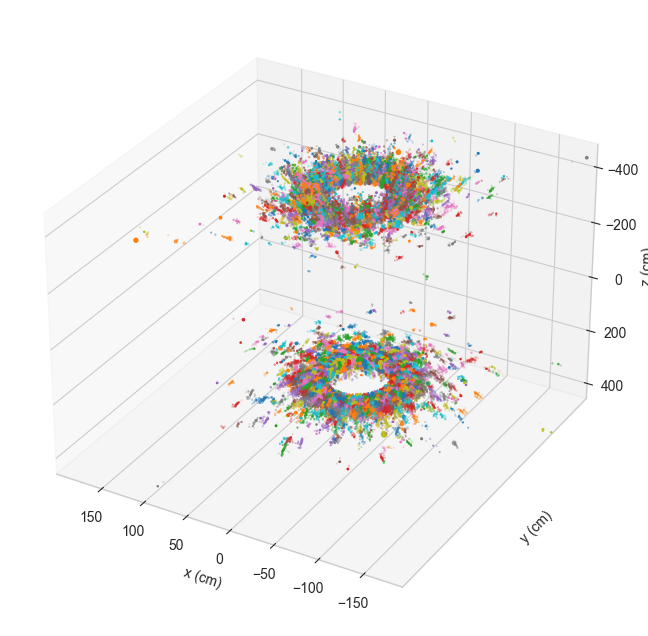

In [59]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
# ax1.set_zlabel("detector layer")
ax1.set_zlabel("z (cm)")
# plt.axis('off')

for x, y, z, e in zip(vx, vy, vzm, ve):
    ax1.scatter(x, y, z, s=e)

# ax1.set_title(f"Front view: reconstruction layer-clusters ({len(vx)})")
# ax1.view_init(0, 180, "x")

ax1.get_yaxis().set_ticks([])
ax1.get_yaxis().set_visible(False)

# Interpretation

I got a single particle and a lot of mess in the reco data.

I only care about the reconstruction quality of this single particle.

How do I know which particle is interesting to me?

I only care about the neighbourhood of this particular trackster?

I could do "min-max" on x,y,z coordinates of the sim-trackster and construct a prism / cone / frustum of all reco-tracksters with a barycentre inside of it.

Let's have a look at an usual profile of a pion.

In [60]:
svi = simtracksters["stsSC_vertices_indexes"].array()[eid]

svz = ak.Array([clusters_z[eid][indices] for indices in svi])
svx = ak.Array([clusters_x[eid][indices] for indices in svi])
svy = ak.Array([clusters_y[eid][indices] for indices in svi])
sve = ak.Array([clusters_e[eid][indices] for indices in svi])

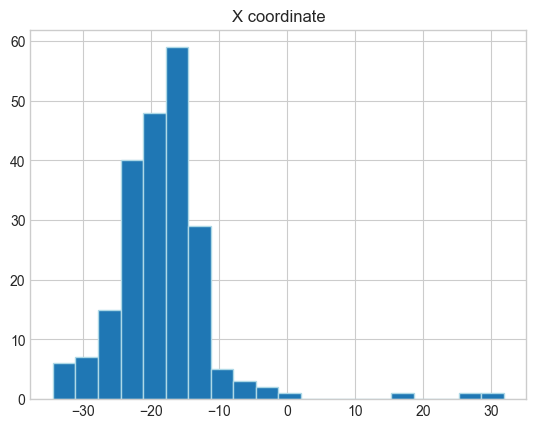

In [61]:
tid = 0

plt.title("X coordinate")
plt.hist(svx[tid], bins=20, edgecolor="lightblue")
plt.show()

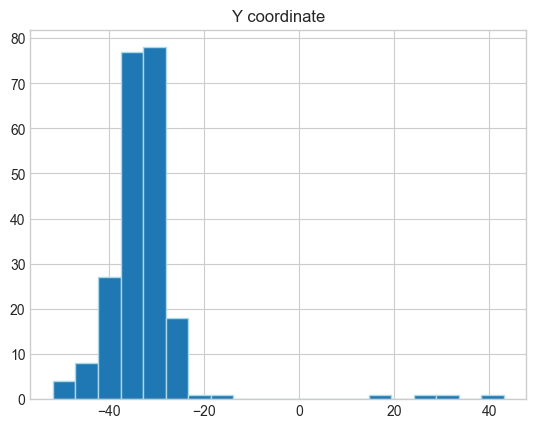

In [62]:
plt.title("Y coordinate")
plt.hist(svy[tid], bins=20, edgecolor="lightblue")
plt.show()

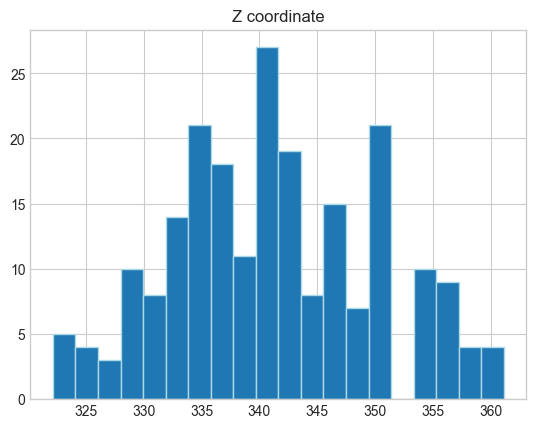

In [63]:
plt.title("Z coordinate")
plt.hist(svz[tid], bins=20, edgecolor="lightblue")
plt.show()

## Compute average X and Y per layer

In [64]:
all_z = list(sorted(set(svz[tid])))

x_coords = {z: [] for z in all_z}
y_coords = {z: [] for z in all_z}
layer_e = {z: [] for z in all_z}

In [65]:
for x, y, z, e in zip(svx[tid], svy[tid], svz[tid], sve[tid]):
    x_coords[z].append(x)   
    y_coords[z].append(y)
    layer_e[z].append(e)

In [66]:
x_avg = []
y_avg = []
e_sum = []

for z in all_z:
    x_avg.append(np.mean(x_coords[z]))  # should weight by energy and multiplicity here
    y_avg.append(np.mean(y_coords[z]))  # should weight by energy and multiplicity here
    e_sum.append(np.sum(layer_e[z]))

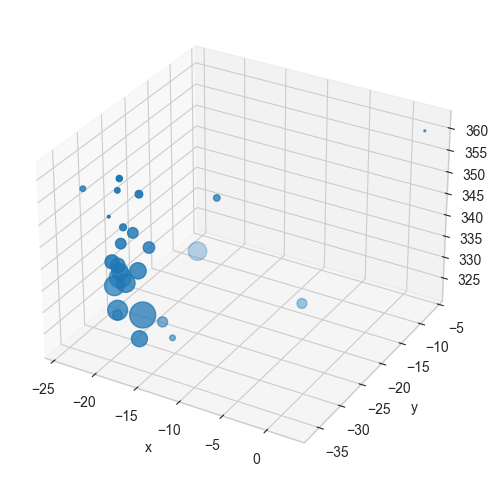

In [67]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_avg, y_avg, all_z, s=np.array(e_sum)*10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# ax.view_init(45, 45, "x")
plt.show()

Plot deviation from the layer mean

In [68]:
x_dev = []
y_dev = []

for i, z in enumerate(all_z):
    xm = x_avg[i]
    ym = y_avg[i]
    x_dev += [abs(xm - x) for x in x_coords[z]]
    y_dev += [abs(ym - y) for y in y_coords[z]]


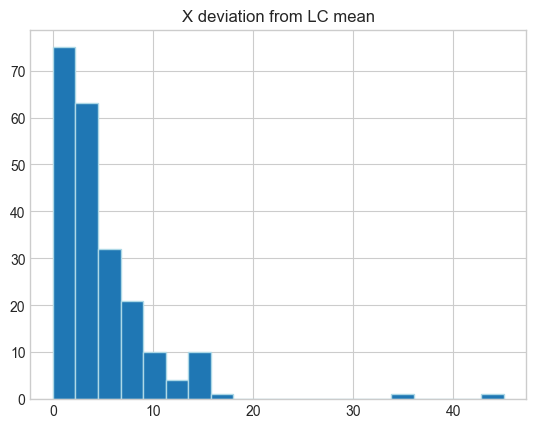

In [69]:
plt.title("X deviation from LC mean")
plt.hist(x_dev, bins=20, edgecolor="lightblue")
plt.show()

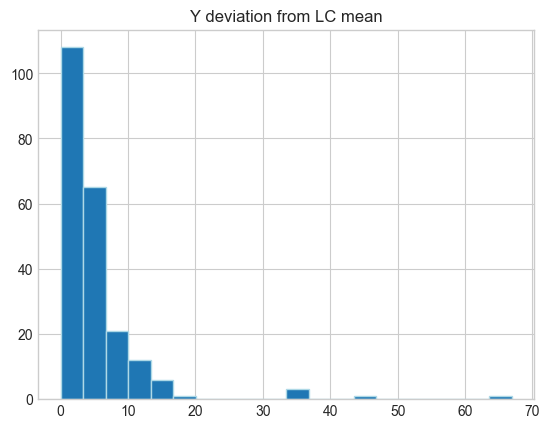

In [70]:
plt.title("Y deviation from LC mean")
plt.hist(y_dev, bins=20, edgecolor="lightblue")
plt.show()

# Plot everything within a cylinder

In [71]:
vi = trackstersMerged["vertices_indexes"].array()[eid]
vx = ak.Array([clusters_x[eid][indices] for indices in vi])
vy = ak.Array([clusters_y[eid][indices] for indices in vi])
vz = ak.Array([clusters_z[eid][indices] for indices in vi])
ve = ak.Array([clusters_e[eid][indices] for indices in vi])

bx = trackstersMerged["barycenter_x"].array()[eid]
by = trackstersMerged["barycenter_y"].array()[eid]
bz = trackstersMerged["barycenter_z"].array()[eid]

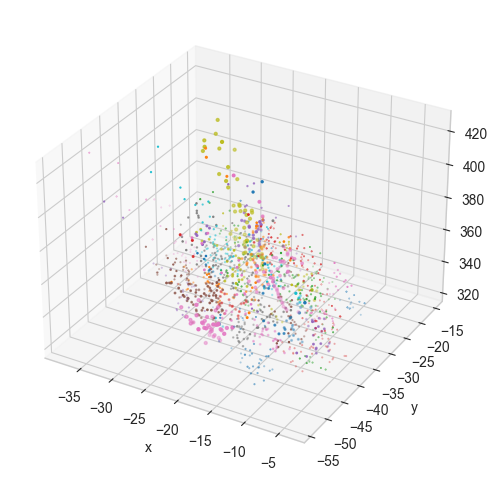

In [72]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for tx, ty, tz, te, tbx, tby, tbz in zip(vx, vy, vz, ve, bx, by, bz):
    plot = False
    # find closest layer to the barycenter
    # bl = np.argmin(np.array(all_z) < bz)

    for x, y, zm, e in zip(tx, ty, tz, te):
        if zm not in x_coords:
            continue
        xm = np.mean(x_coords[zm])
        ym = np.mean(y_coords[zm])
        dst = np.sqrt((xm - x)**2 + (ym - y)**2)
        if dst < 10:
            plot = True
            break
    if plot:
        ax.scatter(tx, ty, tz, s=e*2)

# ax.scatter(x_avg, y_avg, all_z, s=np.array(e_sum))
# ax.view_init(45, 45, "x")
plt.show()

## Selection

select a trackster having at least 50% of the simtrackster energy an is above 10GeV

In [74]:
scores_above_50 = []
scores_below_50 = []
shared_dists = []
shared_dist_reco = []


total = 0
for eid in range(ev_per_file):
    raw_energy = trackstersMerged["raw_energy"].array()[eid]
    sim_raw_energy = simtracksters["stsSC_raw_energy"].array()[eid]
    print(f"total tracksters: {len(raw_energy)}, above 10 GeV: {sum(raw_energy > 10)}, non-zero shared energy:")

    reco2sim_index = np.array(associations["Mergetstracksters_recoToSim_SC"].array()[eid])
    reco2sim_shared = np.array(associations["Mergetstracksters_recoToSim_SC_sharedE"].array()[eid])
    reco2sim_score = np.array(associations["Mergetstracksters_recoToSim_SC_score"].array()[eid])

    # for each reco trackster
    for recoT_idx, (sim_indexes, shared_energies, scores) in enumerate(zip(reco2sim_index, reco2sim_shared, reco2sim_score)):
        # get the shared energy with all simm tracksters
        for simT_idx, shared_energy, score in zip(sim_indexes, shared_energies, scores):
            rt_e = raw_energy[recoT_idx]
            if shared_energy > 0 and score < 0.3:
                st_e = sim_raw_energy[simT_idx]
                fr = shared_energy / st_e
                if fr > 0.5:
                    scores_above_50.append(score)
                else:
                    shared_dists.append(fr)
                    shared_dist_reco.append(shared_energy / rt_e)
                    scores_below_50.append(score)
                total += 1
                print(f"\tsimE: {st_e:.3f}\trecoE: {rt_e:.3f}\tshared: {shared_energy:.3f}\tscore: {score:.4f}")
print(total)

total tracksters: 2764, above 10 GeV: 347, non-zero shared energy:
	simE: 128.992	recoE: 152.154	shared: 97.872	score: 0.0322
total tracksters: 2247, above 10 GeV: 259, non-zero shared energy:
	simE: 323.814	recoE: 301.986	shared: 293.190	score: 0.0002
	simE: 323.814	recoE: 2.026	shared: 1.776	score: 0.0095
	simE: 323.814	recoE: 1.546	shared: 1.173	score: 0.1395
	simE: 323.814	recoE: 6.903	shared: 4.287	score: 0.2170
	simE: 323.814	recoE: 4.341	shared: 1.871	score: 0.2814
	simE: 323.814	recoE: 0.883	shared: 0.538	score: 0.0943
total tracksters: 2802, above 10 GeV: 351, non-zero shared energy:
	simE: 385.574	recoE: 366.656	shared: 360.467	score: 0.0001
total tracksters: 2874, above 10 GeV: 368, non-zero shared energy:
	simE: 565.404	recoE: 543.296	shared: 535.234	score: 0.0001
total tracksters: 3253, above 10 GeV: 458, non-zero shared energy:
	simE: 39.188	recoE: 37.194	shared: 33.533	score: 0.0040
total tracksters: 3253, above 10 GeV: 439, non-zero shared energy:
	simE: 478.494	recoE: 

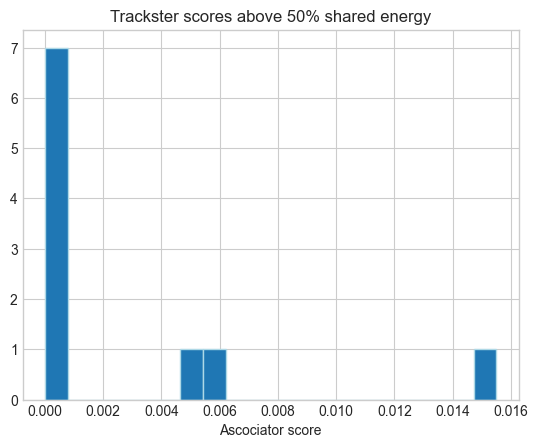

In [38]:
plt.title("Trackster scores above 50% shared energy")
plt.hist(scores_above_50, bins=20, edgecolor="lightblue")
plt.xlabel("Ascociator score")
plt.show()

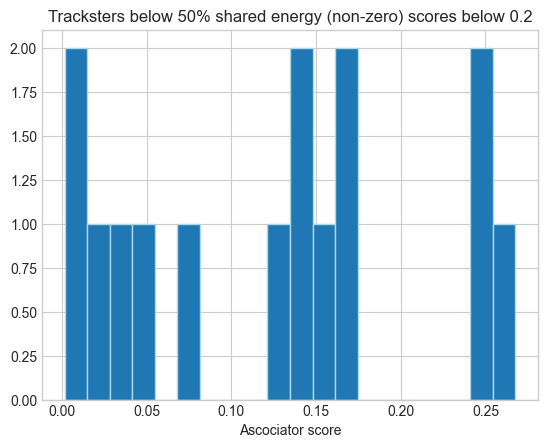

In [39]:
plt.title("Tracksters below 50% shared energy (non-zero) scores below 0.2")
plt.hist(scores_below_50, bins=20, edgecolor="lightblue")
plt.xlabel("Ascociator score")
plt.show()

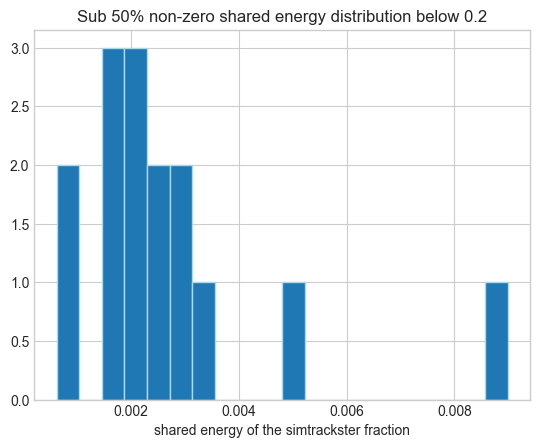

In [40]:
plt.title("Sub 50% non-zero shared energy distribution below 0.2")
plt.hist(shared_dists, bins=20, edgecolor="lightblue")
plt.xlabel("shared energy of the simtrackster fraction")
plt.show()

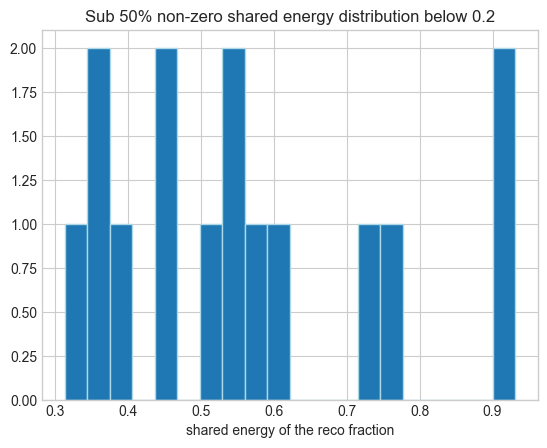

In [41]:
plt.title("Sub 50% non-zero shared energy distribution below 0.2")
plt.hist(shared_dist_reco, bins=20, edgecolor="lightblue")
plt.xlabel("shared energy of the reco fraction")
plt.show()